<h2>Assignment 1 - Linear Regression on Diabetes Dataset</h2>

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Load data from scikit-learn
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

<h4>Task  1: Prepare the 3 datasets</h4>

In [2]:
from sklearn.model_selection import train_test_split

# splitting between testing and training data
train_data, valid_data, train_target, valid_target = train_test_split(
    data, 
    (target[:, np.newaxis]), 
    test_size = 0.2,         # 20% of the data will be used for validation
    random_state = 42
)
# split the training data into testing and training data
train_data, test_data, train_target, test_target = train_test_split(
    train_data, 
    (train_target), 
    test_size = 0.2, 
    random_state = 42
)

print('train_data.shape: ', train_data.shape)
print('train_target.shape: ', train_target.shape)
print()

print('valid_data.shape: ', valid_data.shape)
print('valid_target.shape: ', valid_target.shape)
print()

print('test_data.shape: ', test_data.shape)
print('test_target.shape: ', test_target.shape)

train_data.shape:  (282, 10)
train_target.shape:  (282, 1)

valid_data.shape:  (89, 10)
valid_target.shape:  (89, 1)

test_data.shape:  (71, 10)
test_target.shape:  (71, 1)


<h4>Task 2: Use linear regression from scikit-learn in the following cell, for comparsion of results with basic gradient method and stochastic gradient descent method</h4>

Note: linear regression from scikit-learn uses the closed-form solution of the optimal solution.

Coefficients: 
 [[   7.0366653  -246.78306312  547.24888098  324.79496319 -921.9697261
   472.19859546  172.52537595  292.87021204  764.64280056   83.23467618]]
Intercept: 
 [147.83633605]

Training loss using sklearn - MSE: 2898.79
Validation loss using sklearn - MSE: 2910.86
Testing loss using sklearn - MSE: 2848.75

Training loss found manually - MSE: 1449.39
Validation loss found manually - MSE: 1455.43
Testing loss found manually - MSE: 1424.38




Training score: 0.531
Validation score: 0.451
Testing score: 0.470


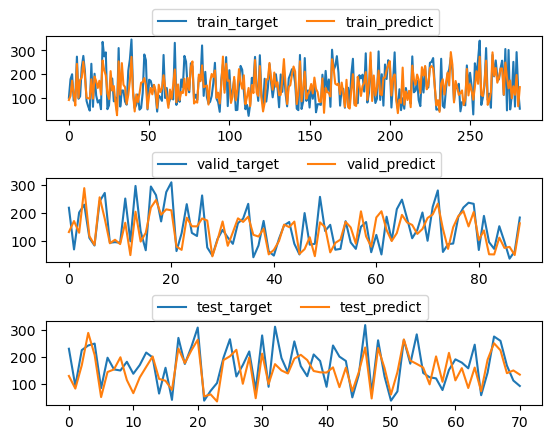

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lr = LinearRegression()
# fit model using training data
lr.fit(train_data, train_target)

# print weights and bias of the model
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print()

# finding mean squared error via sklearn
from sklearn.metrics import mean_squared_error
print("Training loss using sklearn - MSE: %.2f" % (mean_squared_error(train_target, lr.predict(train_data))))
print("Validation loss using sklearn - MSE: %.2f" % (mean_squared_error(valid_target, lr.predict(valid_data))))
print("Testing loss using sklearn - MSE: %.2f" % (mean_squared_error(test_target, lr.predict(test_data))))
print()

# finding mean squared error manually using numpy
print("Training loss found manually - MSE: %.2f" % (np.mean((lr.predict(train_data) - train_target) ** 2) / 2))
print("Validation loss found manually - MSE: %.2f" % (np.mean((lr.predict(valid_data) - valid_target) ** 2) / 2))
print("Testing loss found manually - MSE: %.2f" % (np.mean((lr.predict(test_data) - test_target) ** 2) / 2))
print()

# visualizing true answers and predicted values
fig = plt.figure()
fig.subplots_adjust(hspace = 0.7)

# plot training data: true vs predicted
plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]), train_target, label = "train_target")
plt.plot(np.arange(train_target.shape[0]), lr.predict(train_data), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

# plot validation data: true vs predicted
plt.subplot(3,1,2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label = "valid_target")
plt.plot(np.arange(valid_target.shape[0]), lr.predict(valid_data), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

# plot testing data: true vs predicted
plt.subplot(3,1,3)
plt.plot(np.arange(test_target.shape[0]), test_target, label = "test_target")
plt.plot(np.arange(test_target.shape[0]), lr.predict(test_data), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

# print score of how well the regression model fits the data
print("Training score: %.3f" % lr.score(train_data, train_target))
print("Validation score: %.3f" % lr.score(valid_data, valid_target))
print("Testing score: %.3f" % lr.score(test_data, test_target))

<h4> Task 3: Use basic gradient descent to perform linear regression in the following cell</h4>

Note: Basic gradient descent method computes the gradient using whole training data examples in each iteration.


Training loss - MSE: 1460.21
Validation loss - MSE: 1446.23
Testing loss - MSE: 1439.96





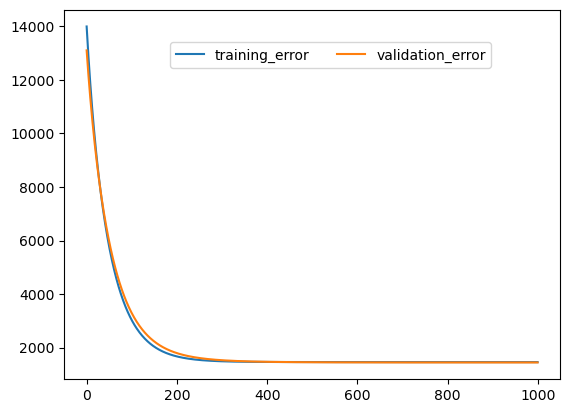

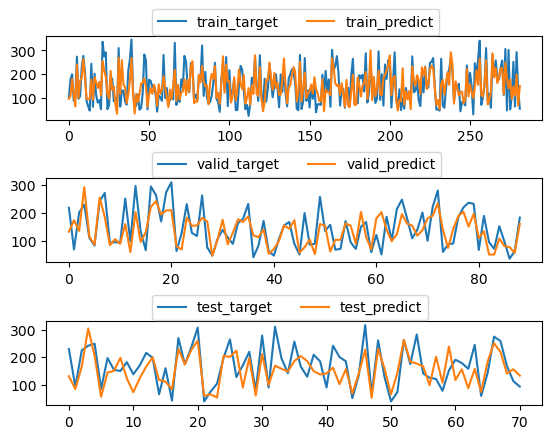

In [4]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.01   # learning rate
numIters = 1000   # number of iterations

from sklearn import preprocessing

# ensure all features have the same scale by using StandardScaler
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
valid_data = scaler.transform(valid_data)
test_data = scaler.transform(test_data)

# adding bias term (intercept)
train_data_intercept = np.insert(train_data, 0, 1, axis = 1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis = 1)
test_data_intercept = np.insert(test_data, 0, 1, axis = 1)

# Model representation
def myModelFunction(X, w):
    return np.dot(X, w)

# Loss function
def myLossFunction(X, w, y):
    return np.mean((myModelFunction(X, w) - y) ** 2) / 2

# Gradient descent
def myTrainingLoop(train_data, train_target, valid_data, valid_target, learning_rate, numIters):
    # training loss history over iteration
    train_losses = np.zeros((numIters, 1))
    # validation loss history over iteration
    valid_losses = np.zeros((numIters, 1))
    # initialize random weights
    w = np.random.normal(0, 1, (train_data.shape[1], 1))

    for i in range(numIters):
        # compute predictions
        Xw = np.dot(train_data, w)
        # compute gradient
        grad = -1 * np.dot(train_data.T, (train_target - Xw)) / (train_data.shape[0])
        # update weights using gradient descent
        w = w + learning_rate * (-1 * grad)
        # record losses for training and validation data
        train_losses[i] = myLossFunction(train_data, w, train_target)
        valid_losses[i] = myLossFunction(valid_data, w, valid_target)

    return w, train_losses, valid_losses

# start training loop
w, train_losses, valid_losses = myTrainingLoop(train_data_intercept, train_target, valid_data_intercept, valid_target, learning_rate, numIters)

# visualize learning curve
plt.plot(np.arange(numIters), train_losses, label = "training_error")
plt.plot(np.arange(numIters), valid_losses, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

print("Training loss - MSE: %.2f" % (myLossFunction(train_data_intercept, w, train_target)))
print("Validation loss - MSE: %.2f" % (myLossFunction(valid_data_intercept, w, valid_target)))
print("Testing loss - MSE: %.2f" % (myLossFunction(test_data_intercept, w, test_target)))

# visualizing true answers and predicted values
fig = plt.figure()
fig.subplots_adjust(hspace = 0.7)

plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]), train_target, label = "train_target")
plt.plot(np.arange(train_target.shape[0]), myModelFunction(train_data_intercept, w), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label = "valid_target")
plt.plot(np.arange(valid_target.shape[0]), myModelFunction(valid_data_intercept, w), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,3)
plt.plot(np.arange(test_target.shape[0]), test_target, label = "test_target")
plt.plot(np.arange(test_target.shape[0]), myModelFunction(test_data_intercept, w), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

<h4> Task 4: Use stochastic gradient descent to perform linear regression in the following cell</h4>

Note:
* Stochastic gradient descent method computes the gradient using only a small **batch** of data examples in each iteration.
* Difference between iterations and epochs
> One **iteration** entails the processing of one batch of data, while one epoch entails the processing of the whole training data.




Epoch 1/100, Training loss: 3233.9565, Validation loss: 3563.0147
Epoch 2/100, Training loss: 1745.2369, Validation loss: 1882.0949
Epoch 3/100, Training loss: 1506.0752, Validation loss: 1533.4342
Epoch 4/100, Training loss: 1466.7374, Validation loss: 1464.1686
Epoch 5/100, Training loss: 1463.3470, Validation loss: 1454.1930
Epoch 6/100, Training loss: 1463.1720, Validation loss: 1460.7917
Epoch 7/100, Training loss: 1471.5984, Validation loss: 1467.6208
Epoch 8/100, Training loss: 1462.6868, Validation loss: 1444.0340
Epoch 9/100, Training loss: 1461.6546, Validation loss: 1451.7000
Epoch 10/100, Training loss: 1463.5102, Validation loss: 1440.6770
Epoch 11/100, Training loss: 1470.4992, Validation loss: 1446.2529
Epoch 12/100, Training loss: 1470.4467, Validation loss: 1428.1767
Epoch 13/100, Training loss: 1462.6646, Validation loss: 1430.6544
Epoch 14/100, Training loss: 1461.6889, Validation loss: 1465.9062
Epoch 15/100, Training loss: 1462.0644, Validation loss: 1444.7592
Epoc

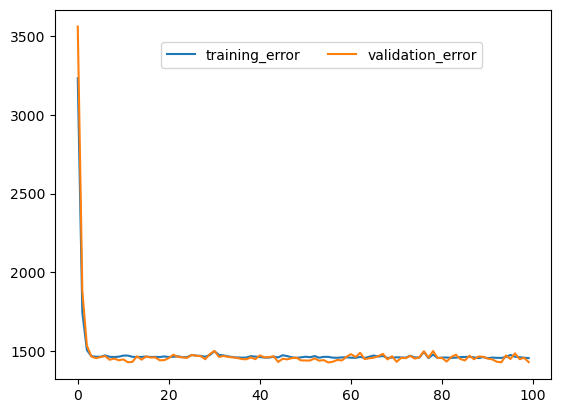

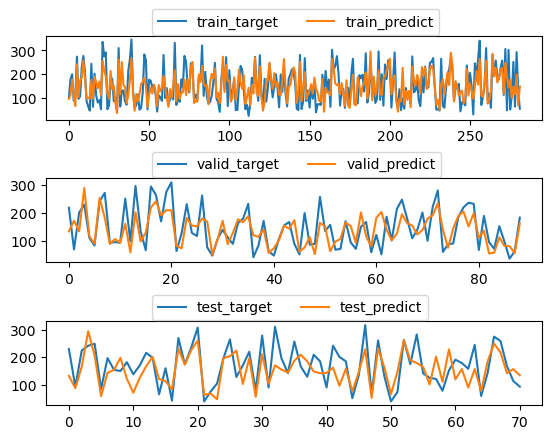

In [6]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.1   # learning rate
batch_size = 32 # number of data samples in a batch
epochs = 100   # number of epochs

from sklearn import preprocessing

# ensure all features have the same scale by using StandardScaler
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
valid_data = scaler.transform(valid_data)
test_data = scaler.transform(test_data)

# adding bias term (intercept)
train_data_intercept = np.insert(train_data, 0, 1, axis = 1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis = 1)
test_data_intercept = np.insert(test_data, 0, 1, axis = 1)

# stochastic gradient descent training loop
def SGDTrainingLoop(train_data, train_target, valid_data, valid_target, learning_rate, epochs, batch_size):
    # number of iterations per epoch
    batches_per_epoch = train_data.shape[0] // batch_size
    # training loss history over iteration
    train_losses = np.zeros((epochs, 1))
    # validation loss history over iteration
    valid_losses = np.zeros((epochs, 1))
    # initialize random weights
    w = np.random.normal(0, 1, (train_data.shape[1], 1))

    # epoch loop
    for epoch in range(epochs):
        # shuffle training data at beginning of each epoch
        shuffled_indices = np.random.permutation(train_data.shape[0])
        shuffled_data = train_data[shuffled_indices]
        shuffled_target = train_target[shuffled_indices]

        for i in range(0, train_data.shape[0], batch_size):
            # select batch of data
            X_batch = shuffled_data[i:i + batch_size]
            y_batch = shuffled_target[i:i + batch_size]

            # compute predictions
            Xw = np.dot(X_batch, w)
            grad = -1 * np.dot(X_batch.T, (y_batch - Xw)) / batch_size

            # update weights
            w = w + learning_rate * (-1 * grad)

        # at end of epoch, calculate and store losses
        train_losses[epoch] = myLossFunction(train_data, w, train_target)
        valid_losses[epoch] = myLossFunction(valid_data, w, valid_target)

        # print progress for each epoch
        print(f"Epoch {epoch + 1}/{epochs}, Training loss: {train_losses[epoch][0]:.4f}, Validation loss: {valid_losses[epoch][0]:.4f}")

    return w, train_losses, valid_losses

# start SGD training loop
w, train_losses, valid_losses = SGDTrainingLoop(train_data_intercept, train_target, valid_data_intercept, valid_target, learning_rate, epochs, batch_size)

# print training, validation, testing loss
print("Training loss - MSE: %.2f" % (myLossFunction(train_data_intercept, w, train_target)))
print("Validation loss - MSE: %.2f" % (myLossFunction(valid_data_intercept, w, valid_target)))
print("Testing loss - MSE: %.2f" % (myLossFunction(test_data_intercept, w, test_target)))

# visualize learning curve
plt.plot(np.arange(epochs), train_losses, label = "training_error")
plt.plot(np.arange(epochs), valid_losses, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

# visualizing true answers and predicted values
fig = plt.figure()
fig.subplots_adjust(hspace = 0.7)

plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]), train_target, label = "train_target")
plt.plot(np.arange(train_target.shape[0]), myModelFunction(train_data_intercept, w), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label = "valid_target")
plt.plot(np.arange(valid_target.shape[0]), myModelFunction(valid_data_intercept, w), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,3)
plt.plot(np.arange(test_target.shape[0]), test_target, label = "test_target")
plt.plot(np.arange(test_target.shape[0]), myModelFunction(test_data_intercept, w), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()